# ASSIGNMENT 3     

# -By Amber Sethi & Alizae Pardiwala

## PROBLEM 6.1, PARTS A TO D

### PART A

**The should data be partitioned into training and validation sets in order to compare and assess the model. Partitioning the data helps to validate the prediction with accuracy.**
**Training set is used to build the model i.e., for model fitting.**
**Validation set is used to validate the model used from the training set.**

### PART B

In [1]:
## Import required packages
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
BostonHousing_df = pd.read_csv('BostonHousing.csv')
BostonHousing_df = BostonHousing_df.iloc[0:1000]
BostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [5]:
#PRINT SOME columns OF DATA 
pd.set_option('display.max_columns', None)
BostonHousing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [6]:
#data types 
BostonHousing_df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [7]:
#COUNT OF MISSING VALUES 
BostonHousing_df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [8]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

In [9]:
outcome

'MEDV'

In [10]:
predictors

['CRIM', 'CHAS', 'RM']

In [11]:
# dummy variable creation
X = pd.get_dummies(BostonHousing_df[predictors], drop_first=True)
y = BostonHousing_df[outcome]

In [12]:
X

,CRIM,CHAS,RM
0,0.00632,0,6.575
1,0.02731,0,6.421
2,0.02729,0,7.185
3,0.03237,0,6.998
4,0.06905,0,7.147
...,...,...,...
501,0.06263,0,6.593
502,0.04527,0,6.120
503,0.06076,0,6.976
504,0.10959,0,6.794


In [13]:
list(X)

['CRIM', 'CHAS', 'RM']

In [14]:
X.dtypes

CRIM    float64
CHAS      int64
RM      float64
dtype: object

In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [16]:
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [17]:
train_X

,CRIM,CHAS,RM
452,5.09017,0,6.297
346,0.06162,0,5.898
295,0.12932,0,6.678
88,0.05660,0,7.007
322,0.35114,0,6.041
...,...,...,...
255,0.03548,0,5.876
72,0.09164,0,6.065
396,5.87205,0,6.405
235,0.33045,0,6.086


In [18]:
train_X.describe()

,CRIM,CHAS,RM
count,303.00000,303.000000,303.000000
mean,3.79127,0.079208,6.240997
std,8.91233,0.270510,0.672760
min,0.00632,0.000000,3.863000
25%,0.08577,0.000000,5.870000
50%,0.25387,0.000000,6.167000
75%,3.68339,0.000000,6.582500
max,73.53410,1.000000,8.398000


In [19]:
valid_X

,CRIM,CHAS,RM
307,0.04932,0,6.849
343,0.02543,0,6.696
47,0.22927,0,6.030
67,0.05789,0,5.878
362,3.67822,0,5.362
...,...,...,...
186,0.05602,0,7.831
372,8.26725,1,5.875
442,5.66637,0,6.219
412,18.81100,0,4.628


In [20]:
valid_X.describe()

,CRIM,CHAS,RM
count,203.000000,203.000000,203.000000
mean,3.348217,0.054187,6.349768
std,8.130012,0.226946,0.741882
min,0.010960,0.000000,3.561000
25%,0.078805,0.000000,5.956000
50%,0.259150,0.000000,6.251000
75%,3.576250,0.000000,6.630500
max,88.976200,1.000000,8.780000


In [21]:
train_y

452    16.1
346    17.2
295    28.6
88     23.6
322    20.4
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 303, dtype: float64

In [22]:
train_y.describe()

count    303.000000
mean      22.112541
std        8.960807
min        5.000000
25%       16.750000
50%       20.600000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [23]:
valid_y.describe()

count    203.000000
mean      23.160099
std        9.526796
min        6.300000
25%       17.650000
50%       21.900000
75%       25.200000
max       50.000000
Name: MEDV, dtype: float64

In [24]:
#fit regression model
BostonHousing_lm = LinearRegression()
BostonHousing_lm.fit(train_X, train_y)

LinearRegression()

In [25]:
# print coefficients
print('intercept ', BostonHousing_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': BostonHousing_lm.coef_}))

# print performance measures
regressionSummary(train_y, BostonHousing_lm.predict(train_X))

intercept  -29.19346743060684
  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


### PART C

In [26]:
pred_y = BostonHousing_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, BostonHousing_lm))
print('AIC : ', AIC_score(train_y, pred_y, BostonHousing_lm))
print('BIC : ', BIC_score(train_y, pred_y, BostonHousing_lm))

adjusted r2 :  0.5507065652226033
AIC :  1952.2995095916203
BIC :  1970.8681736191672


In [27]:
pred_y

array([22.00820409, 19.89362384, 26.37100836, 29.12744836, 21.0146211 ,
       23.18521172, 19.72659442, 19.56345658, 23.00127421, 26.8932982 ,
       21.40365111, 19.11263203, 24.778264  , 19.52265856, 19.50711675,
       26.68587682, 21.70456801, 22.4731298 , 20.00369683, 20.75006488,
       18.31057436, 19.96343922, 31.08600369, 25.54304295, 18.32497944,
       19.48529618, 30.88628782, 25.38047012, 16.17582286, 27.99820849,
       20.47049263, 21.67923664, 24.20799456, 18.25847471, 32.85869708,
       40.03011039, 20.43250551, 21.37556872, 16.93285341, 18.27670281,
       43.4320337 , 19.30140864, 30.3213354 , 23.41645161, 17.31976599,
       25.35618439, 21.13360143, 23.61752788, 21.26866758, 27.84422848,
       22.74881114,  9.38394499, 28.56796455, 23.04755693,  6.45879497,
       25.87273933, 29.81320011, 18.29792449, 25.28713232,  8.73590528,
       21.37070594, 25.24702644, 24.38454389, 34.72224576, 26.77429915,
       15.79164822, 20.7289765 , 30.34076638, 14.05336837, 27.34

In [28]:
# Use predict() to make predictions on a new set
BostonHousing_lm_pred = BostonHousing_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': BostonHousing_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - BostonHousing_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, BostonHousing_lm_pred)

     Predicted  Actual   Residual
307  27.813818    28.2   0.386182
343  26.545802    23.9  -2.645802
47   20.952301    16.6  -4.352301
67   19.728016    22.0   2.271984
362  14.563121    20.8   6.236879
132  23.712901    23.0  -0.712901
292  25.993767    27.9   1.906233
31   21.031780    14.5  -6.531780
218  23.589896    21.5  -2.089896
90   24.217938    22.6  -1.617938
481  25.631148    23.7  -1.931148
344  28.026468    31.2   3.173532
119  18.483361    19.3   0.816639
66   18.973810    19.4   0.426190
312  20.886242    19.4  -1.486242
407  14.625108    27.9  13.274892
376  22.490552    13.9  -8.590552
225  43.317191    50.0   6.682809
201  22.097993    24.1   2.002007
147  11.247730    14.6   3.352270

Regression statistics

                      Mean Error (ME) : 0.1174
       Root Mean Squared Error (RMSE) : 6.4125
            Mean Absolute Error (MAE) : 4.4558
          Mean Percentage Error (MPE) : -7.6160
Mean Absolute Percentage Error (MAPE) : 23.1676


In [29]:
#manual way 
new_df = pd.DataFrame([[0.1, 0, 6]], columns=['CRIM', 'CHAS', 'RM'])
new_df

,CRIM,CHAS,RM
0,0.1,0,6


In [30]:
BostonHousing_lm_pred  = BostonHousing_lm.predict(new_df)
print('Predicted value for median house price is:', BostonHousing_lm_pred)

Predicted value for median house price is: [20.73357813]


### PART D ii

In [31]:
#Correlation
# Create a new dataframe with predictors
predictors_df = X
predictors_df.columns

Index(['CRIM', 'CHAS', 'RM'], dtype='object')

In [32]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
BostonHousing_df = pd.read_csv('BostonHousing.csv')
BostonHousing_df = BostonHousing_df.iloc[0:1000]
BostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [33]:
predictors = ['CRIM','ZN','INDUS','CHAS', 'NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
outcome = 'MEDV'

In [34]:
outcome

'MEDV'

In [35]:
predictors

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [36]:
# dummy variable creation
X = pd.get_dummies(BostonHousing_df[predictors], drop_first=True)
y = BostonHousing_df[outcome]

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [38]:
list(X)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [39]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
dtype: object

In [40]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [41]:
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [42]:
train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,12.67
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,6.27
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,5.50
322,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,19.37
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88


In [43]:
train_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.79127,11.400990,11.236106,0.079208,0.556431,6.240997,68.929373,3.842242,9.561056,408.709571,18.389109,13.124158
std,8.91233,23.712163,6.836160,0.270510,0.120068,0.672760,28.529649,2.144680,8.699665,168.467974,2.183225,7.416232
min,0.00632,0.000000,0.460000,0.000000,0.392000,3.863000,6.000000,1.137000,1.000000,187.000000,12.600000,2.940000
25%,0.08577,0.000000,5.640000,0.000000,0.447000,5.870000,45.650000,2.108400,4.000000,279.500000,16.850000,7.280000
50%,0.25387,0.000000,9.690000,0.000000,0.538000,6.167000,79.700000,3.317500,5.000000,330.000000,18.800000,12.040000
75%,3.68339,12.500000,18.100000,0.000000,0.631000,6.582500,94.300000,5.164950,24.000000,666.000000,20.200000,17.135000
max,73.53410,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [44]:
valid_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,7.53
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,7.18
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,18.80
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,8.10
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,4.45
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,8.88
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,16.59
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,34.37


In [45]:
valid_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000
mean,3.348217,11.307882,10.988522,0.054187,0.552104,6.349768,68.045813,3.724592,9.53202,407.532020,18.554680,11.949901
std,8.130012,22.786407,6.910568,0.226946,0.109565,0.741882,27.632305,2.049391,8.74007,169.054367,2.138894,6.665483
min,0.010960,0.000000,1.250000,0.000000,0.385000,3.561000,2.900000,1.129600,1.00000,188.000000,12.600000,1.730000
25%,0.078805,0.000000,4.930000,0.000000,0.460000,5.956000,42.450000,2.079450,4.00000,277.000000,17.600000,6.740000
50%,0.259150,0.000000,8.560000,0.000000,0.538000,6.251000,74.900000,3.048000,5.00000,335.000000,19.100000,10.290000
75%,3.576250,12.500000,18.100000,0.000000,0.624000,6.630500,93.150000,5.166300,24.00000,666.000000,20.200000,16.030000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.00000,711.000000,22.000000,34.370000


In [46]:
train_y

452    16.1
346    17.2
295    28.6
88     23.6
322    20.4
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 303, dtype: float64

In [47]:
train_y.describe()

count    303.000000
mean      22.112541
std        8.960807
min        5.000000
25%       16.750000
50%       20.600000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [48]:
valid_y.describe()

count    203.000000
mean      23.160099
std        9.526796
min        6.300000
25%       17.650000
50%       21.900000
75%       25.200000
max       50.000000
Name: MEDV, dtype: float64

In [49]:
#fit regression model
BostonHousing_lm = LinearRegression()
BostonHousing_lm.fit(train_X, train_y)

LinearRegression()

In [50]:
# print coefficients
print('intercept ', BostonHousing_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': BostonHousing_lm.coef_}))

# print performance measures
regressionSummary(train_y, BostonHousing_lm.predict(train_X))

intercept  39.407583567024204
   Predictor  coefficient
0       CRIM    -0.113346
1         ZN     0.068345
2      INDUS     0.041599
3       CHAS     2.298887
4        NOX   -18.791297
5         RM     3.457044
6        AGE     0.004379
7        DIS    -1.398042
8        RAD     0.277844
9        TAX    -0.012418
10   PTRATIO    -0.817811
11     LSTAT    -0.524662

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.5589
            Mean Absolute Error (MAE) : 3.1637
          Mean Percentage Error (MPE) : -3.3981
Mean Absolute Percentage Error (MAPE) : 16.4873


In [51]:
pred_y = BostonHousing_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, BostonHousing_lm))
print('AIC : ', AIC_score(train_y, pred_y, BostonHousing_lm))
print('BIC : ', BIC_score(train_y, pred_y, BostonHousing_lm))

adjusted r2 :  0.7295574434336857
AIC :  1807.2312305565645
BIC :  1859.2234898336956


In [52]:
pred_y

array([17.86245415, 15.13273528, 27.7974796 , 29.9318821 , 22.66905074,
       19.49394655, 20.86157199, 25.84119908, 19.3755664 , 30.33475752,
       19.51230104, 19.08789726, 24.31300806, 16.75986559, 14.07042209,
       25.77657297, 24.1185535 , 21.58326604, 20.32986364, 18.76425552,
       18.55610634, 20.54627681, 30.15929627, 29.39773272, 15.99040431,
       18.56938885, 34.60155662, 19.21722597, 12.18401013, 31.43586674,
       24.04379029, 15.30962638, 25.00340363, 19.51269465, 38.53812362,
       44.68098785, 22.54479065, 19.9602436 ,  7.09062756, 20.24254152,
       39.94236557, 23.91506086, 35.81851563, 23.34862602, 17.24988601,
       32.43104923, 16.97291512, 19.75010087, 13.00799994, 33.91372844,
       23.48494999, 12.36378187, 22.89296925, 18.89441532, 18.08427555,
       30.74786272, 32.65084987, 20.54373048, 29.7218814 ,  8.78486681,
       19.49640849, 30.37800469, 20.88235526, 34.21135259, 24.28329171,
       13.94286208, 24.0558299 , 31.60850982, 16.41595327, 25.97

In [53]:
# Use predict() to make predictions on a new set
BostonHousing_lm_pred = BostonHousing_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': BostonHousing_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - BostonHousing_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, BostonHousing_lm_pred)

     Predicted  Actual   Residual
307  32.603783    28.2  -4.403783
343  28.241448    23.9  -4.341448
47   17.954508    16.6  -1.354508
67   21.272579    22.0   0.727421
362  17.822854    20.8   2.977146
132  20.241447    23.0   2.758553
292  33.124091    27.9  -5.224091
31   18.358507    14.5  -3.858507
218  24.028497    21.5  -2.528497
90   26.528751    22.6  -3.928751
481  26.338679    23.7  -2.638679
344  29.055490    31.2   2.144510
119  20.373736    19.3  -1.073736
66   26.817516    19.4  -7.417516
312  22.962319    19.4  -3.562319
407  19.964380    27.9   7.935620
376  17.017640    13.9  -3.117640
225  38.365862    50.0  11.634138
201  30.346983    24.1  -6.246983
147   7.862138    14.6   6.737862

Regression statistics

                      Mean Error (ME) : -0.0337
       Root Mean Squared Error (RMSE) : 5.0814
            Mean Absolute Error (MAE) : 3.5830
          Mean Percentage Error (MPE) : -5.1201
Mean Absolute Percentage Error (MAPE) : 16.9763


In [54]:
#Correlation
# Create a new dataframe with predictors
predictors_df = X
predictors_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [55]:
import numpy as np
import seaborn as sns
corr = predictors_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


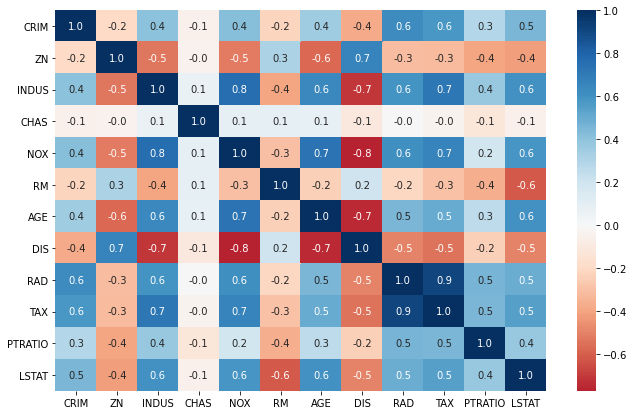

In [56]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.savefig("mycorr.png")

**Based on the correlation table and the heatmap, following are the pairs that are highly correlated:-**

**NOX and INDUS**

**AGE and NOX**

**DIS and AGE**

**TAX and INDUS**

**DIS and NOX**

**TAX and RAD**

**Variables: NOX, INDUS, AGE, DIS, TAX and RAD; can be removed to eliminate potential redundancy and multicollinearity**


### PART D iii

In [57]:
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [58]:
#fit regression model
BostonHousing_lm = LinearRegression()
BostonHousing_lm.fit(train_X, train_y)

LinearRegression()

In [59]:
#backward elimination

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove AGE
Step: score=1803.57, remove INDUS
Step: score=1803.57, remove None
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [60]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


In [61]:
#forward selection 

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [62]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


In [63]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [64]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733
